[View in Colaboratory](https://colab.research.google.com/github/JacksonIsaac/kadenze-deeplearning-creative-applications/blob/master/Kadenze_Session_2.ipynb)

In [0]:
#%pylab
%matplotlib inline

In [0]:
import os
import tensorflow as tf
import numpy as np

In [0]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

In [0]:
plt.style.use('ggplot')

Text(0.5,0,'Parameter')

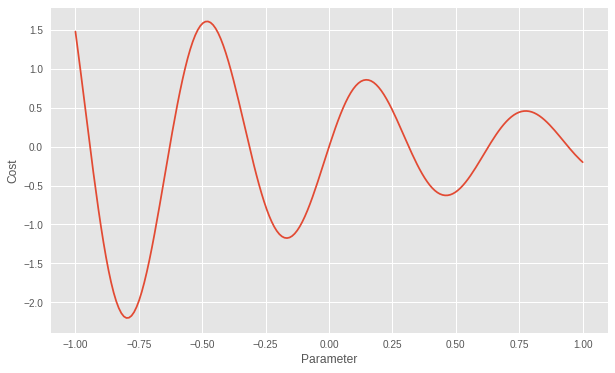

In [5]:
fig = plt.figure(figsize=(10,6))
ax = fig.gca()
x = np.linspace(-1, 1, 200)
hz = 10
cost = np.sin(hz*x) * np.exp(-x)
ax.plot(x, cost)
ax.set_ylabel('Cost')
ax.set_xlabel('Parameter')

In [0]:
gradient = np.diff(cost)

In [7]:
gradient

array([-0.24873082, -0.25619419, -0.26092369, -0.26292601, -0.2622352 ,
       -0.25891185, -0.25304186, -0.24473515, -0.23412404, -0.22136147,
       -0.20661904, -0.19008492, -0.17196161, -0.15246364, -0.13181511,
       -0.11024729, -0.08799612, -0.06529976, -0.04239608, -0.01952035,
        0.00309714,  0.02523329,  0.0466743 ,  0.06721764,  0.08667384,
        0.10486822,  0.12164227,  0.13685499,  0.15038393,  0.16212607,
        0.17199848,  0.17993873,  0.18590515,  0.18987682,  0.19185333,
        0.19185446,  0.1899195 ,  0.1861065 ,  0.18049131,  0.17316648,
        0.16423992,  0.1538336 ,  0.14208198,  0.12913042,  0.11513349,
        0.10025325,  0.08465744,  0.06851767,  0.05200765,  0.03530134,
        0.01857126,  0.00198669, -0.0142879 , -0.03009444, -0.04528275,
       -0.05971184, -0.07325123, -0.08578198, -0.09719771, -0.10740543,
       -0.11632614, -0.12389545, -0.13006386, -0.13479701, -0.13807568,
       -0.13989574, -0.14026785, -0.13921706, -0.1367823 , -0.13

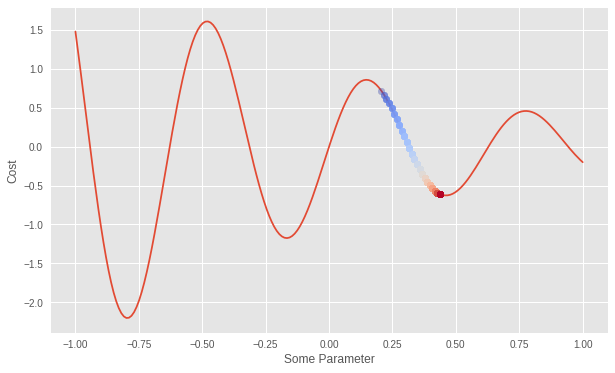

In [8]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca()

x = np.linspace(-1, 1, 200)
hz = 10

cost = np.sin(hz*x)*np.exp(-x)

ax.plot(x, cost)
ax.set_ylabel('Cost')
ax.set_xlabel('Some Parameter')

n_iterations = 500

cmap = plt.get_cmap('coolwarm')
c_norm = colors.Normalize(vmin=0, vmax=n_iterations)
scalar_map = cmx.ScalarMappable(norm=c_norm, cmap=cmap)

init_p = 120 #np.random.randint(len(x)*0.2, len(x)*0.8)
learning_rate = 1.0

for iter_i in range(n_iterations):
    #print(init_p)
    init_p -= learning_rate * gradient[int(init_p)]
    #print(init_p)
    ax.plot(x[int(init_p)], cost[int(init_p)], 'ro', alpha=(iter_i + 1)/n_iterations, color=scalar_map.to_rgba(iter_i))

In [0]:
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

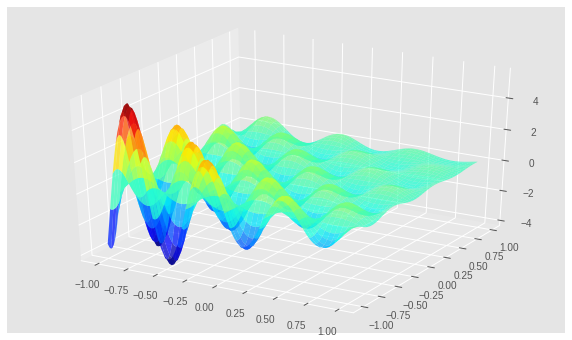

In [10]:
fig = plt.figure(figsize=(10,6))
ax = fig.gca(projection='3d')

x, y = np.mgrid[-1:1:0.02, -1:1:0.02]
X, Y, Z = x, y, np.sin(hz*x) * np.exp(-x) * np.cos(hz*y) * np.exp(-y)

ax.plot_surface(X, Y, Z, rstride=2, cstride=2, alpha=0.75, cmap='jet', shade=False)

ValueError: ignored

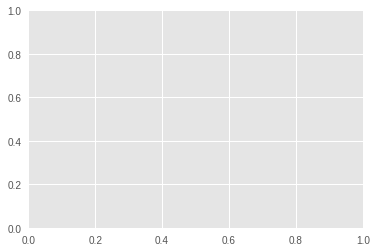

In [11]:
n_obs = 1000
x = np.linspace(-3, 3, n_obs)

plt.scatter(x, y, alpha=0.15, marker='+')

In [0]:
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

In [0]:
sess = tf.InteractiveSession()

(array([  6.,  24.,  60., 146., 218., 248., 176.,  85.,  29.,   8.]),
 array([-0.32657364, -0.26394084, -0.20130804, -0.13867523, -0.07604243,
        -0.01340963,  0.04922317,  0.11185597,  0.17448878,  0.23712158,
         0.29975438]),
 <a list of 10 Patch objects>)

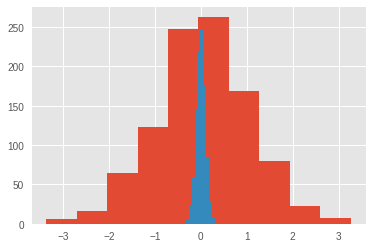

In [15]:
n = tf.random_normal([1000]).eval()
plt.hist(n)
n = tf.random_normal([1000], stddev=0.1).eval()
plt.hist(n)

In [0]:
W = tf.Variable(tf.random_normal([1], dtype=tf.float32, stddev=0.1), name='weight')
B = tf.Variable(tf.constant([1], dtype=tf.float32), name='bias')
Y_pred = X * W + B

In [0]:
def distance(p1, p2):
    return tf.abs(p1 - p2)

ValueError: ignored

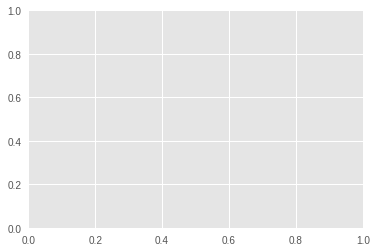

In [18]:
cost = distance(Y_pred, tf.sin(X))
cost = tf.reduce_mean(distance(Y_pred, Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

n_iterations = 500
fig, ax = plt.subplots(1, 1)

ax.scatter(x, y, alpha=0.15, marker='+')

In [19]:
idxs = np.arange(100)

batch_size = 10

n_batches = len(idxs) // batch_size
for batch_i in range(n_batches):
    print(idxs[batch_i * batch_size : (batch_i + 1) * batch_size])

[0 1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18 19]
[20 21 22 23 24 25 26 27 28 29]
[30 31 32 33 34 35 36 37 38 39]
[40 41 42 43 44 45 46 47 48 49]
[50 51 52 53 54 55 56 57 58 59]
[60 61 62 63 64 65 66 67 68 69]
[70 71 72 73 74 75 76 77 78 79]
[80 81 82 83 84 85 86 87 88 89]
[90 91 92 93 94 95 96 97 98 99]


In [20]:
rand_idxs = np.random.permutation(idxs)

for batch_i in range(n_batches):
    print(rand_idxs[batch_i * batch_size : (batch_i + 1) * batch_size])

[82 63 61 80 50 25 87 84 93 15]
[11 79 53  1 33 30 18 88 52 22]
[35 26 69 67 10 14 51  0 98 41]
[66 74 70 56 81 85 96 47 59 75]
[71 62 28 20 64 73 91 86 17 31]
[90 29  4 97 39 37  8 46 38  7]
[76 72 54  6 60 58 24 43 45 48]
[32  5 12 40 94  9  3 65 27 78]
[57 95 92 34 83 55 99 42 16 13]
[21 19 49 77  2 68 89 44 36 23]


In [0]:
from skimage.data import astronaut
from scipy.misc import imresize

/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if issubdtype(ts, int):
/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


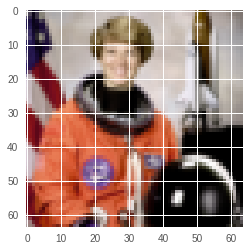

In [22]:
img = imresize(astronaut(), (64, 64))

plt.imshow(img)

In [0]:
xs = []
ys = []

for row_i in range(img.shape[0]):
    for col_i in range(img.shape[1]):
        xs.append([row_i, col_i])
        ys.append(img[row_i, col_i])

In [24]:
xs = np.array(xs)
ys = np.array(ys)

xs = (xs - np.mean(xs)) / np.std(xs)

print(xs.shape)
print(ys.shape)


(4096, 2)
(4096, 3)


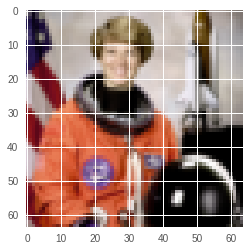

In [25]:
plt.imshow(ys.reshape(img.shape))

In [34]:
plt.imshow(xs.reshape(img.shape))

ValueError: ignored

In [0]:
def linear(X, n_input, n_output, activation=None, scope=None):
    with tf.variable_scope(scope or "linear"):
        W = tf.get_variable(
            name='W',
            shape=[n_input, n_output],
            initializer=tf.random_normal_initializer(mean=0.0, stddev=0.1))
        b = tf.get_variable(
            name='b',
            shape=[n_output],
            initializer=tf.constant_initializer())
        h = tf.matmul(X, W) + b
        if activation is not None:
            h = activation(h)
        return h

In [0]:
X = tf.placeholder(tf.float32, shape=[None, 2], name='X')
Y = tf.placeholder(tf.float32, shape=[None, 3], name='Y')

In [0]:
n_neurons = [2, 64, 64, 64, 64, 64, 3]

current_input = X

for layer_i in range(1, len(n_neurons)):
    current_input = linear(
    X=current_input,
    n_input = n_neurons[layer_i - 1],
    n_output = n_neurons[layer_i],
    activation = tf.nn.relu if (layer_i + 1) < len(n_neurons) else None,
    scope = 'layer_' + str(layer_i)
    )
    
Y_pred = current_input

cost = tf.reduce_mean(
    tf.reduce_sum(distance(Y_pred, Y), 1))

In [0]:
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

0 172.51074
1 160.76828
2 152.91628
3 142.003
4 120.50147
5 114.61498
6 111.03574
7 107.618866
8 101.140564
9 95.22149
10 90.774796
11 88.20772
12 86.522095
13 85.04173
14 83.81905
15 81.82598
16 80.55877
17 79.322365
18 78.548775
19 77.68723
20 77.46674
21 76.08865
22 75.97928
23 74.51367
24 73.667725
25 73.0884
26 72.06376
27 71.49611
28 71.53575
29 70.458305
30 69.62142
31 69.1987
32 68.45829
33 68.13279
34 67.51061
35 67.34617
36 66.947235
37 66.2594
38 65.873955
39 65.1898
40 65.36366
41 64.83418
42 64.24846
43 64.04455
44 63.401516
45 63.938866
46 63.5823
47 63.23222
48 63.21101
49 62.935757
50 62.790443
51 61.870632
52 62.25466
53 61.52427
54 61.21572
55 61.161068
56 60.988544
57 61.06611
58 61.14292
59 60.886555
60 61.068947
61 59.99545
62 59.953987
63 59.891586
64 59.550056
65 59.414143
66 59.936897
67 59.6035
68 59.577248
69 59.244965
70 58.86436
71 59.366943
72 58.847225
73 58.22586
74 58.5242
75 57.868996
76 58.370235
77 57.83486
78 57.643883
79 58.552284
80 57.294136
81 57

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


420 40.886673
421 43.8836
422 42.44772
423 41.69578
424 41.707703
425 41.099216
426 42.264038
427 43.27723
428 42.847652
429 41.291946
430 42.082737
431 41.722084
432 42.020187
433 41.469673
434 42.34438
435 41.11063
436 40.68102
437 42.189552
438 42.86586
439 41.62991
440 43.03525
441 43.232872
442 42.130642
443 42.426155
444 41.346222
445 42.032257
446 40.625996
447 42.36328
448 41.169678
449 42.10876
450 40.885483
451 42.889442
452 40.601654
453 41.629448
454 40.394745
455 42.898636
456 40.43886
457 40.575024
458 40.95485
459 40.658447
460 40.877064
461 40.79461
462 41.974316
463 41.578514
464 42.60297
465 42.47544
466 40.4112
467 41.08236
468 41.16991
469 41.27813
470 40.577015
471 41.334675
472 40.758423
473 41.0694
474 41.28481
475 41.405384
476 40.453064
477 41.224358
478 40.992783
479 43.298862
480 41.861553
481 40.3045
482 41.45178
483 42.085236
484 41.825455
485 41.06064
486 41.501434
487 41.401287
488 40.93582
489 41.672607
490 40.514637
491 41.75765
492 40.605354
493 41.240

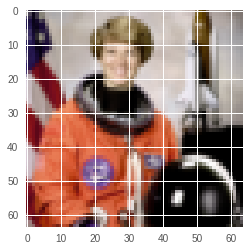

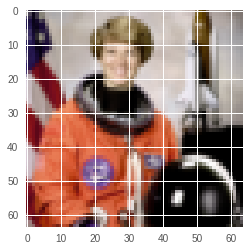

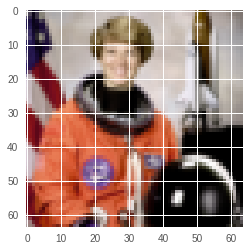

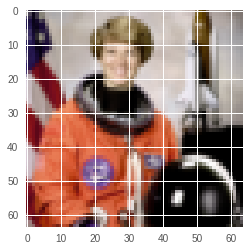

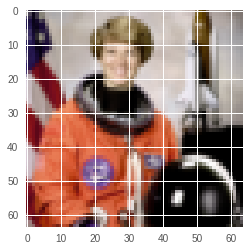

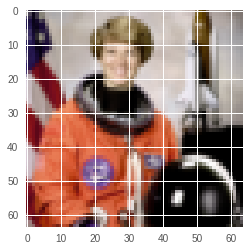

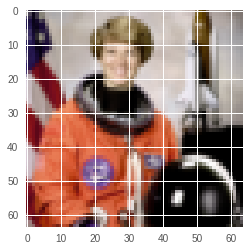

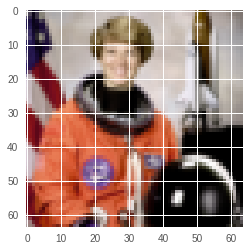

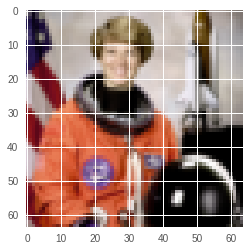

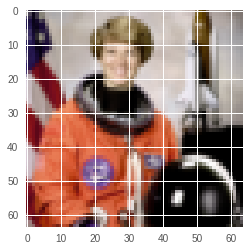

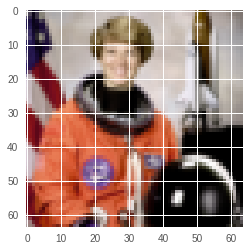

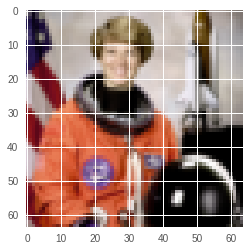

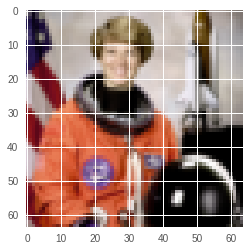

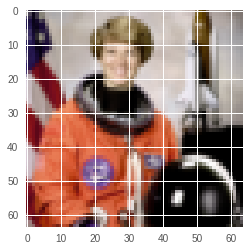

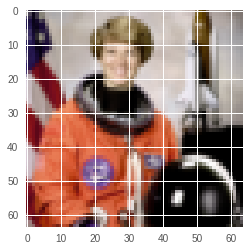

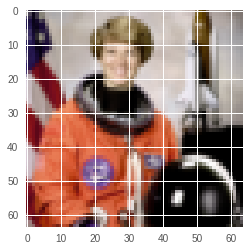

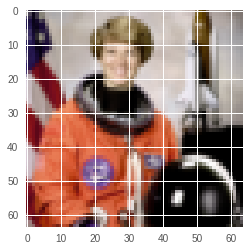

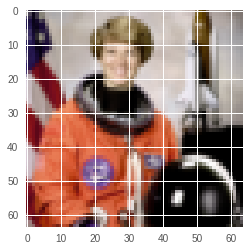

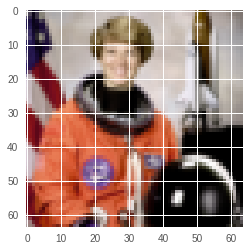

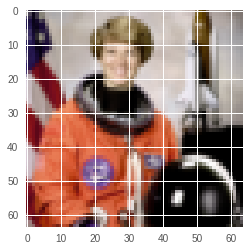

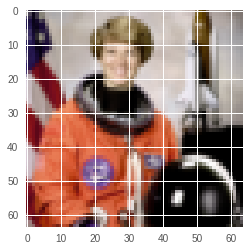

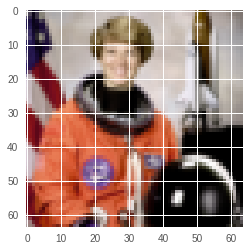

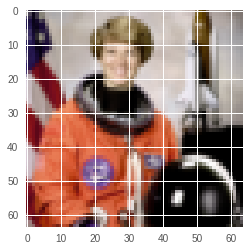

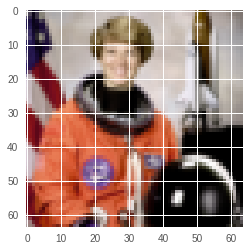

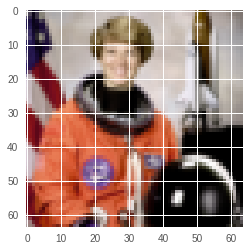

In [31]:
n_iterations = 500

batch_size = 50

with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    
    prev_cost = 0.0
    
    for it_i in range(n_iterations):
        idxs = np.random.permutation(range(len(xs)))
        
        n_batches = len(idxs) // batch_size
        
        for batch_i in range(n_batches):
            idxs_i = idxs[batch_i * batch_size : (batch_i + 1) * batch_size]
            
            sess.run(optimizer, feed_dict={X: xs, Y: ys})
            
        training_cost = sess.run(cost, feed_dict={X: xs, Y: ys})
        print(it_i, training_cost)
        
        if (it_i + 1) % 20 == 0:
            ys_pred = Y_pred.eval(feed_dict={X: xs}, session=sess)
            
            fig, ax = plt.subplots(1, 1)
            imp = np.clip(ys_pred.reshape(img.shape), 0, 255).astype(np.uint8)
            plt.imshow(img)
            fig.canvas.draw()